In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import random as rn

%matplotlib inline

In [120]:
all_df = pd.read_csv('../raw_dataframe.csv')

In [4]:
print('events:\n{}\n'.format(all_df.eventUri.value_counts()))
print('event count: {}'.format(len(all_df.eventUri.value_counts())))

events:
eng-3222496    1110
eng-3224761    1006
eng-3226365     975
eng-3222149     972
eng-3224981     809
eng-3220888     804
eng-3225273     685
eng-3226218     607
eng-3228697     599
eng-3228523     545
eng-3222143     541
eng-3225297     524
eng-3228362     517
eng-3224046     507
eng-3227203     451
eng-3225836     395
eng-3230732     362
eng-3232019     333
eng-3225311     322
eng-3221578     298
eng-3221228     289
Name: eventUri, dtype: int64

event count: 21


In [5]:
print('Text statistics')
for func in ['mean', 'std', 'median']:
    print('length {0}: {1}'.format(func, getattr(all_df.body.map(lambda x: len(x)), func)()))

Text statistics
length mean: 3271.75559244
length std: 2548.38472865
length median: 2731.0


In [73]:
def get_srcs(df):
    srcs = []
    for source in df.source:
        try:
            title = eval(source)['title']
        except:
            continue
        srcs.append(title)
    return srcs

def get_src(source):
    try:
        title = eval(source)['title']
    except:
        return
    return title

### Org title

In [123]:
all_df['org_title'] = df.source.map(get_src)

### Top sources

In [16]:
total_srcs = get_srcs(all_df)
sorts = Counter(total_srcs).most_common()[:10]
sorts

[(u'Mail Online', 307),
 (u'Daily News and Analysis (DNA) India', 305),
 (u'Business Standard', 246),
 (u'Associated Press', 240),
 (u'Firstpost', 148),
 (u'Sify', 147),
 (u'Washington Post', 141),
 (u'The Times of India', 120),
 (u'Clearfield Gant Daily', 120),
 (u'One News Page', 114)]

### Per event

In [35]:
all_srcs = []
for group in df.groupby(by='eventUri'):
    srcs = get_srcs(group[1])
    all_srcs.append(srcs)
    
    #print('{0}:\n {1}\n\n'.format(group[0], Counter(srcs).most_common()[:10]))

### Number of events a source appears in

In [23]:
srcs_dict = {src: 0 for src in total_srcs}
for group in all_df.groupby(by='eventUri'):
    event_srcs = list(set(get_srcs(group[1])))
    for src in event_srcs:
        srcs_dict[src] += 1

,Unnamed: 0,index,body,categories,concepts,date,dateTime,eventUri,id,isDuplicate,lang,originalArticle,sim,source,time,title,uri,url
0,0,0,Johnny Depp on Friday apologised for joking ab...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Performin...",[{u'uri': u'http://en.wikipedia.org/wiki/Unite...,2017-06-24,2017-06-24T06:48:00Z,eng-3232019,23786926,False,eng,NaN,0.831373,"{u'title': u'The Express Tribune', u'id': u'19...",06:48:00,Actor Johnny Depp apologises for 'poor taste' ...,680801740,https://tribune.com.pk/story/1443879/actor-joh...
1,1,1,Mumbai: Hollywood star Johnny Depp had kicked ...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Performin...","[{u'label': {u'eng': u'Twitter'}, u'score': 2,...",2017-06-24,2017-06-24T06:32:00Z,eng-3232019,23785477,False,eng,NaN,0.811765,"{u'title': u'The Asian Age', u'id': u'2273', u...",06:32:00,Intended no malice: Johnny Depp on Donald Trum...,680797202,http://www.asianage.com/entertainment/hollywoo...
2,2,2,Glastonbury: Johnny Depp on Friday apologised ...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Performin...",[{u'uri': u'http://en.wikipedia.org/wiki/Unite...,2017-06-24,2017-06-24T06:09:00Z,eng-3232019,23783315,False,eng,NaN,0.807843,"{u'title': u'http://www.livemint.com/', u'id':...",06:09:00,Johnny Depp apologised for 'poor taste' Donald...,680790841,http://www.livemint.com/Consumer/pie4p4G8N3Exy...
3,3,3,Depp personally introduced a screening of his ...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Movies', ...",[{u'uri': u'http://en.wikipedia.org/wiki/Unite...,2017-06-23,2017-06-23T08:00:00Z,eng-3232019,23575684,False,eng,NaN,0.800000,"{u'title': u'Contactmusic.com', u'id': u'275',...",08:00:00,Johnny Depp Talks About Donald Trump Assassina...,680209952,http://www.contactmusic.com/johnny-depp/news/j...
4,4,4,Los Angeles -- Johnny Depp asked a crowd at th...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Music/Con...",[{u'uri': u'http://en.wikipedia.org/wiki/Los_A...,2017-06-23,2017-06-23T06:58:00Z,eng-3232019,23564337,False,eng,NaN,0.792157,"{u'title': u'Channel', u'id': u'3000', u'uri':...",06:58:00,Johnny Depp joked about assassinating Donald T...,680179456,http://www.channel24.co.za/Gossip/News/johnny-...
5,5,5,While speaking about President Donald Trump at...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Performin...",[{u'uri': u'http://en.wikipedia.org/wiki/Tenne...,2017-06-23,2017-06-23T16:38:00Z,eng-3232019,23697806,False,eng,NaN,0.788235,"{u'title': u'MLive.com', u'id': u'128', u'uri'...",16:38:00,Johnny Depp asks when the last time an actor a...,680540467,http://www.mlive.com/news/us-world/index.ssf/2...
6,6,6,Johnny Depp on Friday apologized for joking ab...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Performin...",[{u'uri': u'http://en.wikipedia.org/wiki/Unite...,2017-06-23,2017-06-23T19:27:00Z,eng-3232019,23714213,False,eng,NaN,0.788235,"{u'title': u'am New York', u'id': u'9671', u'u...",19:27:00,Johnny Depp apologizes for Trump assassination...,680583416,http://www.amny.com/entertainment/celebrities/...
7,7,7,I'm guessing Johnny Depp wasn't thinking about...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Performin...",[{u'uri': u'http://en.wikipedia.org/wiki/Somer...,2017-06-23,2017-06-23T12:24:00Z,eng-3232019,23628115,False,eng,NaN,0.788235,"{u'title': u'amp1037.cbslocal.com', u'id': u'1...",12:24:00,Johnny Depp Jokes About Assassinating Presiden...,680354365,http://amp1037.cbslocal.com/2017/06/23/johnny-...
8,8,8,Johnny Depp has apologized for joking about th...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Performin...",[{u'uri': u'http://en.wikipedia.org/wiki/Engla...,2017-06-24,2017-06-24T08:50:00Z,eng-3232019,23799730,False,eng,NaN,0.788235,"{u'title': u'Boston Herald', u'id': u'2238', u...",08:50:00,Johnny Depp apologizes for Trump assassination...,680836227,http://www.bostonherald.com/news/national/2017...
9,9,9,LOS ANGELES -- Johnny Depp asked a crowd at th...,"[{u'wgt': 100, u'label': u'dmoz/Arts/Movies/Fi...",[{u'uri': u'http://en.wikipedia.org/wiki/Somer...,2017-06-23,2017-06-23T07:27:00Z,eng-3232019,23569154,False,eng,

In [34]:
srcs_with_cover

{u'ABC News': 16,
 u'Agence France Presse (AFP)': 18,
 u'Associated Press': 19,
 u'Belfast Telegraph': 16,
 u'Business Insider': 18,
 u'Business Standard': 18,
 u'CBS News': 16,
 u'CNBC': 16,
 u'CNN International': 18,
 u'Channel NewsAsia': 17,
 u'Clearfield Gant Daily': 18,
 u'Daily News': 19,
 u'Daily News and Analysis (DNA) India': 21,
 u'Economic Times': 16,
 u'Federal News Radio': 18,
 u'Firstpost': 18,
 u'Fox News': 18,
 u'International Business Times UK': 17,
 u'KIRO': 16,
 u'Mail Online': 21,
 u'One News Page': 20,
 u'Reuters': 18,
 u'San Francisco Gate': 16,
 u'Sify': 18,
 u'Special Broadcasting Service Corporation (SBS)': 17,
 u'Sputnik': 17,
 u'Star Tribune': 17,
 u'The Detroit News': 16,
 u'The Guardian': 17,
 u'The New Indian Express': 17,
 u'The New York Times': 18,
 u'The Telegraph': 16,
 u'USA Today': 19,
 u'Washington Post': 20,
 u'msn.com': 17,
 u'themalaymailonline.com': 19}

In [33]:
srcs_with_cover = {key: value for key, value in srcs_dict.items() if value > 21*.75}
print('total sources: {}\nsource with cover (>.75): {}'.format(len(np.unique(total_srcs)), len(srcs_with_cover)))

total sources: 1248
source with cover (>.75): 36


### For sources with cover, how many articles are in each event?

In [47]:
srcs_with_cover_events = {key: {event_uri: Counter(get_srcs(df)).get(key, 0) 
                                for event_uri, df in df.groupby(by='eventUri')} 
                          for key in srcs_with_cover.keys()}

In [59]:
cover_df = pd.DataFrame(srcs_with_cover_events).transpose()

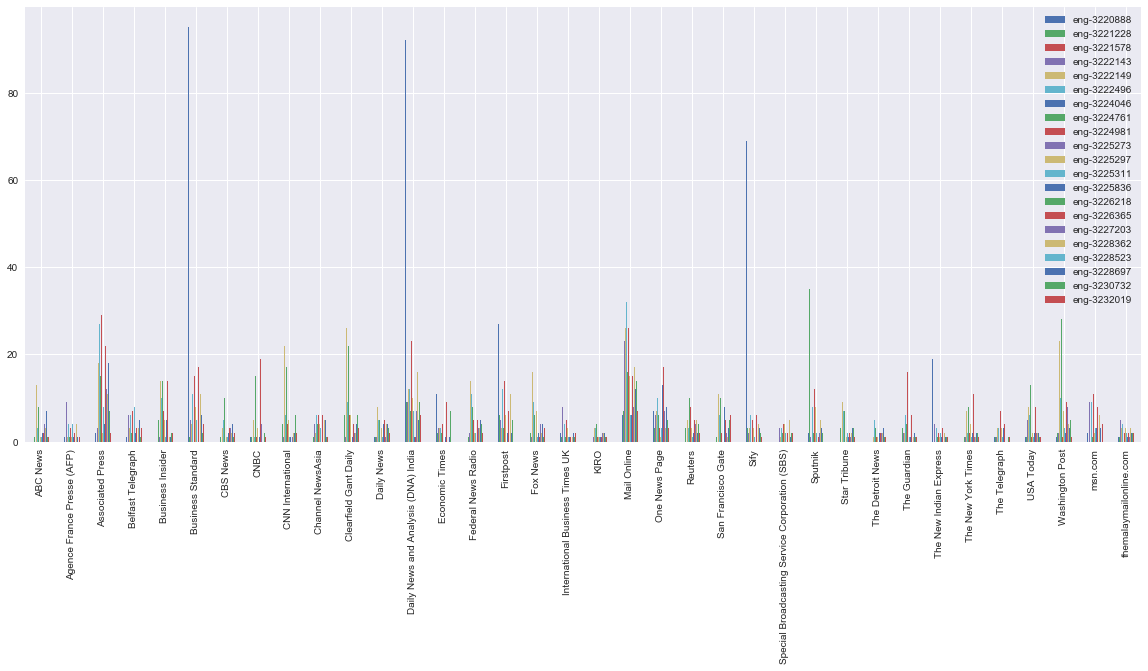

In [67]:
cover_df.plot(kind='bar', figsize=(20, 8));

### Sample articles

In [125]:
cover_articles = {}
dfs = []
for event_uri, df in all_df.groupby(by='eventUri'):
    cover_articles[event_uri] = {}
    for src in srcs_with_cover.keys():
        dfs.append(df.loc[df.org_title == src, :])
article_df = pd.concat(dfs)

# Event registry

In [ ]:
from eventregistry import *
er = EventRegistry(apiKey = 'f6487666-7742-4605-a6b2-45db4a1e6928')

In [ ]:
EVENTS = [QueryEvent(event) for event in np.unique(df.eventUri.values)]